# Studi kasus menggunakan algoritma Logistic

## 1. Import library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## 2. Data preparation

In [2]:
data = pd.read_csv("car.csv")
data

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,0,35,20000,0
1,681,0,40,43500,0
2,353,0,49,74000,0
3,895,0,40,107500,1
4,661,0,25,79000,0
...,...,...,...,...,...
995,863,0,38,59000,0
996,800,1,47,23500,0
997,407,1,28,138500,1
998,299,1,48,134000,1


## 3. EDA

In [3]:
data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,0,35,20000,0
1,681,0,40,43500,0
2,353,0,49,74000,0
3,895,0,40,107500,1
4,661,0,25,79000,0


#### Tipe Data

In [4]:
data.dtypes

User ID         int64
Gender          int64
Age             int64
AnnualSalary    int64
Purchased       int64
dtype: object

#### Data Duplikat

In [5]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

#### Jumlah Data

In [6]:
rows,columns = data.shape
print("Jumlah Variabel (kolom):",columns)
print("Jumlah Data (baris):",rows)

Jumlah Variabel (kolom): 5
Jumlah Data (baris): 1000


#### Jumlah Data NaN

In [7]:
data.isna().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

#### Jumlah Data Null (kosong)

In [8]:
data.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

#### Korelasi Antar Data

In [9]:
correl = data.corr()
print(correl)

               User ID    Gender       Age  AnnualSalary  Purchased
User ID       1.000000  0.039164  0.017647      0.006541   0.015911
Gender        0.039164  1.000000  0.084760      0.063301   0.047211
Age           0.017647  0.084760  1.000000      0.166042   0.616036
AnnualSalary  0.006541  0.063301  0.166042      1.000000   0.364974
Purchased     0.015911  0.047211  0.616036      0.364974   1.000000


#### Diagram HeatMap

<Axes: >

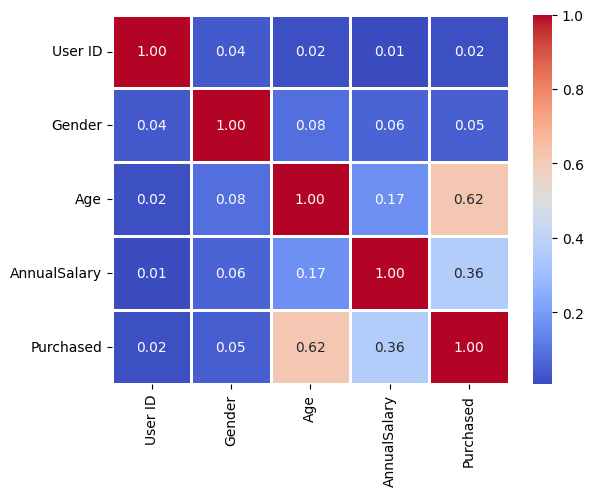

In [10]:
sns.heatmap(correl, cmap="coolwarm", annot=True, fmt=".2f", linecolor='white', linewidths=2)

#### Diagram Box Plot

<Axes: >

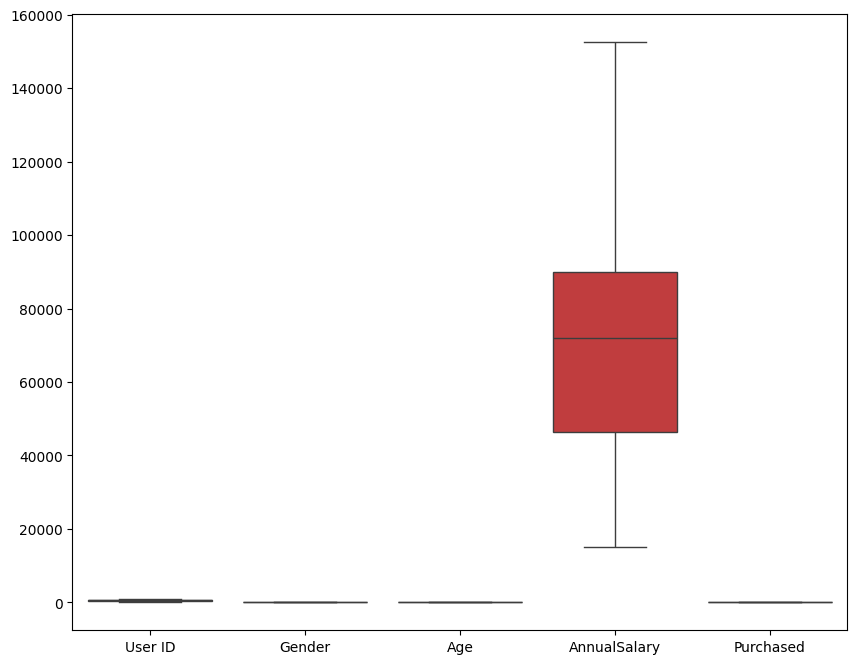

In [11]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=data)

## 4. Modeling

#### Memilih Variabel

In [12]:
X = data[['Age', 'AnnualSalary']]
y = data['Purchased']

#### Scalling Standarisasi

In [13]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

#### Menambahkan 1 kolom untuk intercept di sebelah kiri

In [14]:
X = np.hstack((np.ones((X.shape[0], 1)), X))
X

array([[ 1.        , -0.47711966, -1.52849808],
       [ 1.        , -0.00990495, -0.84676745],
       [ 1.        ,  0.83108153,  0.03803187],
       ...,
       [ 1.        , -1.13122026,  1.90916486],
       [ 1.        ,  0.73763859,  1.77862069],
       [ 1.        ,  0.36386682,  0.02352696]])

In [15]:
n_samples, n_features = X.shape
weights = np.zeros(n_features)
learning_rate = 0.01
n_iterations = 1000

#### fungsi perulangan sigmoid

In [16]:
# Definisi fungsi sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent untuk Logistic Regression
for i in range(n_iterations):
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    errors = predictions - y
    gradient = np.dot(X.T, errors) / n_samples
    weights -= learning_rate * gradient

## 5. Evaluasi

Accuracy: 82.60%


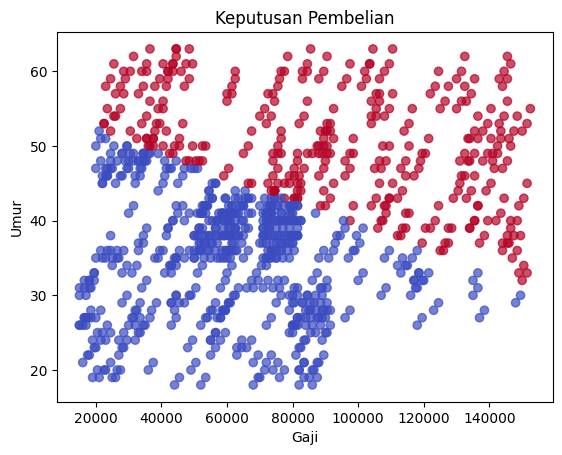

In [17]:
# Prediksi dan evaluasi
def predict(X, weights):
    return (sigmoid(np.dot(X, weights)) >= 0.5).astype(int)

y_pred = predict(X, weights)

# Akurasi
accuracy = np.mean(y_pred == y) * 100
print(f"Accuracy: {accuracy:.2f}%")

# Visualisasi keputusan
plt.scatter(data['AnnualSalary'], data['Age'], c=y_pred, cmap='coolwarm', alpha=0.7)
plt.title("Keputusan Pembelian")
plt.xlabel("Gaji")
plt.ylabel("Umur")
plt.show()

### 5.1 Menghitung jumlah aktual dan prediksi penjualan

In [18]:
actual_positive = np.sum(y)  # Jumlah mobil benar-benar terjual
actual_negative = len(y) - actual_positive  # Tidak terjual

predicted_positive = np.sum(y_pred)  # Mobil diprediksi terjual
predicted_negative = len(y_pred) - predicted_positive  # Tidak terjual

In [19]:
print(f"Jumlah Mobil Terjual (sebenarnya): {actual_positive}")
print(f"Jumlah Mobil Tidak Terjual (sebenarnya): {actual_negative}")
print(f"Jumlah Mobil Terjual (prediksi): {predicted_positive}")
print(f"Jumlah Mobil Tidak Terjual (prediksi): {predicted_negative}")

Jumlah Mobil Terjual (sebenarnya): 402
Jumlah Mobil Tidak Terjual (sebenarnya): 598
Jumlah Mobil Terjual (prediksi): 352
Jumlah Mobil Tidak Terjual (prediksi): 648


### 5.2 Menghitung dengan matrik

In [20]:
# Hitung metrik evaluasi
true_positive = np.sum((y_pred == 1) & (y == 1))
false_positive = np.sum((y_pred == 1) & (y == 0))
false_negative = np.sum((y_pred == 0) & (y == 1))
true_negative = np.sum((y_pred == 0) & (y == 0))

precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

In [21]:
print("\nMatriks Evaluasi:")
print(f"Presisi: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")


Matriks Evaluasi:
Presisi: 0.82
Recall: 0.72
F1-Score: 0.77


## 6. Visualisasi

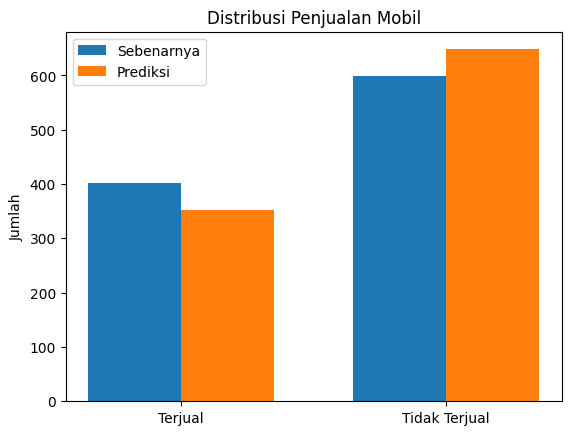

In [22]:
labels = ['Terjual', 'Tidak Terjual']
actual_counts = [actual_positive, actual_negative]
predicted_counts = [predicted_positive, predicted_negative]

x = np.arange(len(labels))  # Lokasi label
width = 0.35  # Lebar bar

fig, ax = plt.subplots()
ax.bar(x - width/2, actual_counts, width, label='Sebenarnya')
ax.bar(x + width/2, predicted_counts, width, label='Prediksi')

ax.set_ylabel('Jumlah')
ax.set_title('Distribusi Penjualan Mobil')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()